# Create first Model

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data (scale pixel values to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),        # Turn 28x28 image into 784-length vector
    layers.Dense(128, activation='relu'),        # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')       # Output layer for 10 classes (0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=7)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8764 - loss: 0.4354
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9641 - loss: 0.1225
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9765 - loss: 0.0803
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9827 - loss: 0.0578
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9864 - loss: 0.0444
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0343
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0261
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0924
Test accuracy: 0.98


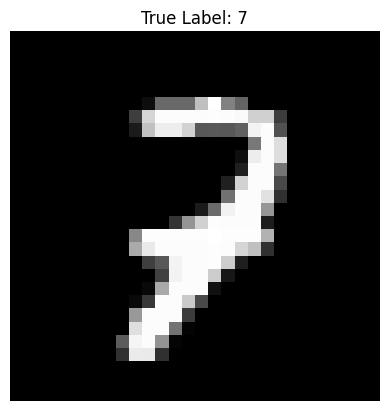

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Label: 7


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Choose an image from the test set
image_index = 950  # You can change this index to any image
image = x_test[image_index]

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {y_test[image_index]}")
plt.axis('off')
plt.show()

# Reshape the image (since model expects 1D array, not 2D)
image = np.expand_dims(image, axis=0)  # Shape becomes (1, 28, 28)

# Predict with the model
predicted_label = model.predict(image)
predicted_digit = np.argmax(predicted_label)  # Get the digit with highest probability

print(f"Predicted Label: {predicted_digit}")


In [9]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

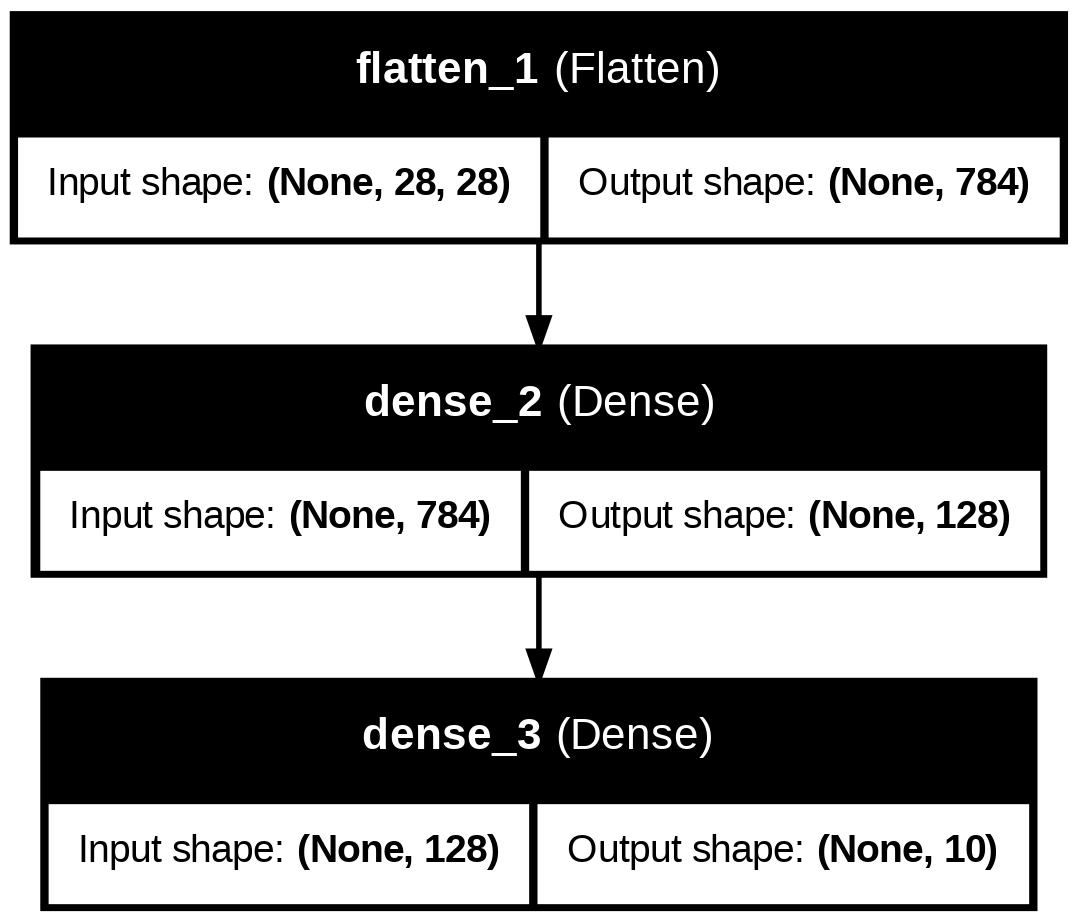

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

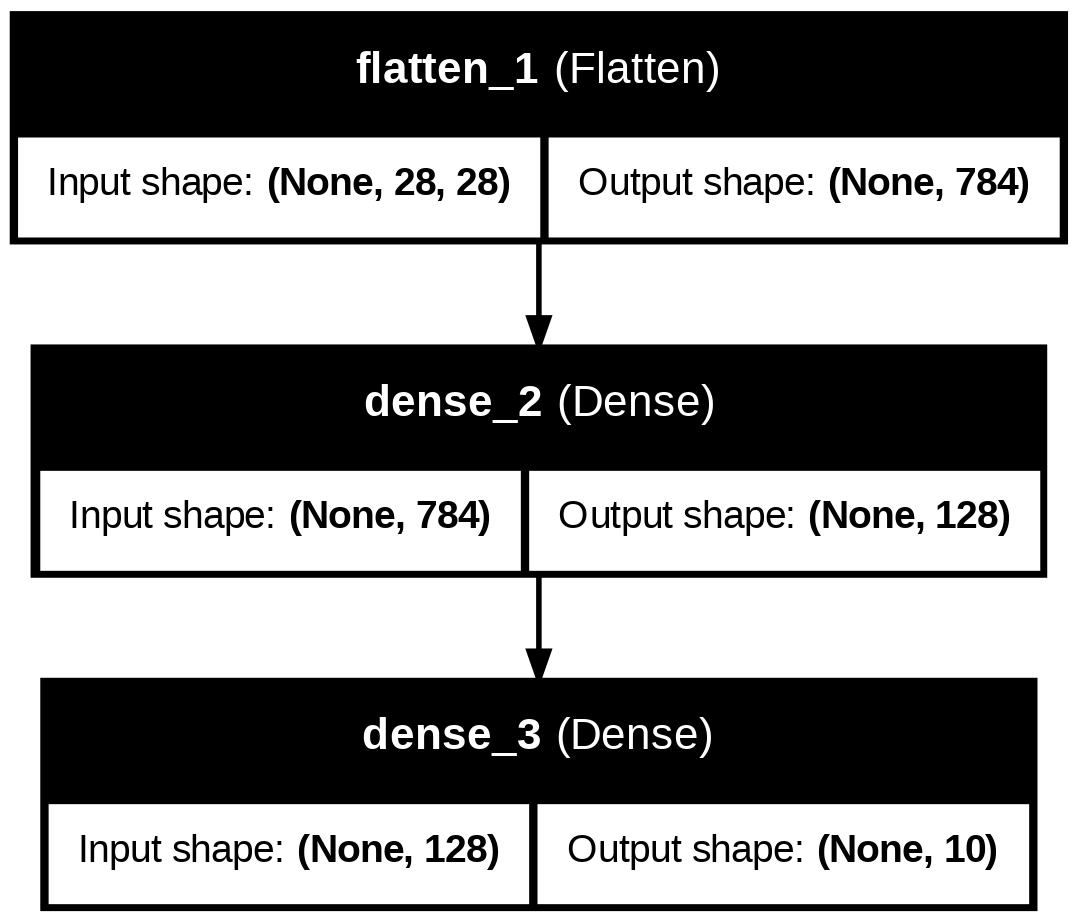

In [11]:
from IPython.display import Image
Image(filename='model_architecture.png')

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8570 - loss: 0.5070
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9570 - loss: 0.1484
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9710 - loss: 0.1009
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


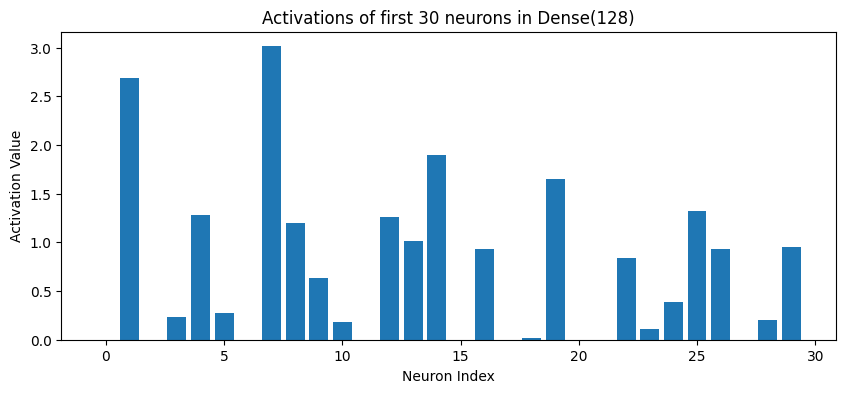

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.0
x_test = x_test.reshape(-1, 784).astype("float32") / 255.0

# 2. Build the model using Functional API (this is the trick!)
inputs = Input(shape=(784,))
x = Dense(128, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# 3. Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64)

# 4. Build an activation model that outputs from all layers
activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers])

# 5. Pass one test image to get activations
test_img = x_test[0].reshape(1, 784)
activations = activation_model.predict(test_img)

# 6. Visualize first 30 neuron activations from first dense layer
first_layer_activation = activations[1]  # layer 1 is Dense(128)
plt.figure(figsize=(10, 4))
plt.bar(range(30), first_layer_activation[0][:30])
plt.title("Activations of first 30 neurons in Dense(128)")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Value")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

# 1. Load and preprocess data (reshape for CNN)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 2. Build the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=64, verbose=1)

# 4. Visualize the filters (kernels) of the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values for visualization
filters = (filters - filters.min()) / (filters.max() - filters.min())

# Plot the filters
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):  # We have 16 filters in the first Conv2D layer
    ax = axes[i // 4, i % 4]
    ax.imshow(filters[:, :, 0, i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Filter {i + 1}")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
137/938 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.6829 - loss: 1.1026